In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen
import re
import ipywidgets as widgets
from IPython.display import display, Markdown
import random

# Numerical Method: Monte Carlo Integration

Using simulations and the law of large numbers, it is possible to numerically itegrate funtions using a Monte Carlo simlulation. This process becomes practically useful when situations require integrating higher dimensional functions such as a vector valued function $$ F(X) $$ where the vector X resides in a Nth(finite) dimensional space. 

To start, observing the $R^1$ case will develop intuition into constructing a Monte Carlo Integral. The average value of a function can be captured by an integral which can be observed as $$ \sigma(f) = \dfrac{1}{b-a} \int_{a}^{b} f(x) \, dx$$ where $\sigma$ is the average value of the function.

Where Monte Carlo comes in, is to simulate the process of integrating a function by approximating its partial sums, and by using the property of the law of large numbers, the integrated function's value will equal the long term average value of the function. Thus, the Monte Carlo Integral $$MCI = \dfrac{b-a}{N} \sum_{n=1}^{N} f(x_n) \approx \int_{a}^{b} f(x) \, dx$$ where N is the total number of partial sums.

Prior to running the Monte Carlo Simulation properly, the helper function constructed below is desined to test if the Monte Carlo integration is working properly.

In [16]:
def integral_peram_check(fn, lower_bound, upper_bound):
    """This function's purpose is to simply check if the proper arguments are passed into a function.
    """
    from math import isinf 
    assert isinf(lower_bound) is not True and isinf(upper_bound) is not True, "DomainError: Improper integrals have not been implemented yet" 
    
    try:
        fn(lower_bound)
    except ZeroDivisionError as sing:
        return 'Lower bound created singularity: {0}'.format(type(sing))
        
    try:    
        fn(upper_bound)
    except ZeroDivisionError as sing:
        return 'Upper bound created singularity: {0}'.format(type(sing))
    
    return True

In [18]:
def generate_random_points(a, b, limit):
    """ This function takes in parameters to construct random values within a specified interval. The number of 
        random values are determinted by the limit parameter.
    """
    interval_points = make_array()
    for points in np.arange(limit):
        random_val = random.uniform(a, b)
        interval_points = np.append(interval_points, random_val)
    return interval_points

def monte_carlo_integration(fn, lower_bound, upper_bound, limit, points=None):
    """ This function performs monte carlo integration over a given interval 
        using random points within the specified bounds.
    """
    potental_error = integral_peram_check(fn, lower_bound, upper_bound)
    assert potental_error is True, repr(potental_error) 
    
    interval_points = generate_random_points(lower_bound, upper_bound, limit)
    partial_sum = np.sum(list(map(fn, interval_points)))
    monte_carlo_integral = ((upper_bound - lower_bound) / limit) * partial_sum
    return monte_carlo_integral

def simulate_mcarlo_integration(fn, lower_bound, upper_bound, limit, simulations=1000):
    """ For a specified number of simulations, this function performs monte carlo integration
        and stores the results from each simulation into an array.
    """
    potental_error = integral_peram_check(fn, lower_bound, upper_bound)
    assert potental_error is True, repr(potental_error) 
    
    simulated_mcarlo_integration = make_array()
    for mc_simulation in range(simulations):
        interval_points = generate_random_points(lower_bound, upper_bound, limit)
        partial_sum = np.sum(list(map(fn, interval_points)))
        simulated_mcarlo_integration = np.append(simulated_mcarlo_integration,
                                                (upper_bound - lower_bound) / limit * partial_sum)
    return simulated_mcarlo_integration

In [19]:
sine_fn = lambda x: (1/np.pi) * x * np.sin(x) # fourier transform when n=1
lower_bound = -np.pi
upper_bound = np.pi
limit = 1000
observed_mcarlo_integral = monte_carlo_integration(sine_fn, lower_bound, upper_bound, limit)
print("Observed Monte Carlo Integral value: {0}".format(observed_mcarlo_integral))

Observed Monte Carlo Integral value: 1.9682639596021607


In [12]:
mc_integral = simulate_mcarlo_integration(sine_fn, lower_bound, upper_bound, limit)

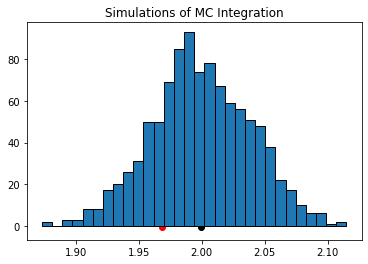

In [20]:
plt.hist(mc_integral, bins=30)
plt.title('Simulations of MC Integration')
plt.scatter(observed_mcarlo_integral, -0.5, color='red')
plt.scatter(np.mean(mc_integral), -0.5, color='black');
# Table().with_column('Monte Carlo Integral', mc_integral).hist()

In [21]:
# Construct CI at 95%
lower_CI = percentile(2.5, mc_integral)
upper_CI = percentile(97.5, mc_integral)
print("We are 95% confident that the value of the Monte Carlo Integral is within [{0}, {1}]".format(round(lower_CI, 3), round(upper_CI, 3)))
print("The empirical mean of the Monte Carlo Integral is {0}".format(round(np.mean(mc_integral), 3)))
print("The observed error between the original MCI and EMCI is {0}".format(round(abs(np.mean(mc_integral)-np.mean(observed_mcarlo_integral)), 3)))

We are 95% confident that the value of the Monte Carlo Integral is within [1.922, 2.074]
The empirical mean of the Monte Carlo Integral is 1.999
The observed error between the original MCI and EMCI is 0.031
